## Import the data set required - {Height X Width}(Pixels) X 3(R,G,B)

In [ ]:
from keras.datasets import cifar10

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

#Import Datasets from keras

## Figure out the number of classes in the outptut dataset

In [8]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Using TensorFlow backend.


NameError: name 'train_X' is not defined

## Plot the numpy array which stores the RGB value of each pixel into an actual image

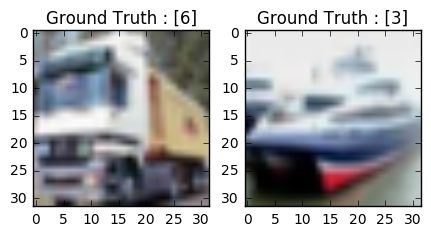

In [3]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [4]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [5]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: [6]
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [6]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [7]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [8]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 2
num_classes = 10

In [9]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 302s - loss: 1.4579 - acc: 0.4722 - val_loss: 1.1879 - val_acc: 0.5803
Epoch 2/2
40000/40000 [==============================] - 263s - loss: 1.0215 - acc: 0.6422 - val_loss: 0.9626 - val_acc: 0.6624


In [10]:
fashion_model.save("fashion_model_dropout.h5py")

In [11]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [12]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

 9984/10000 [============================>.] - ETA: 0s

In [13]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.970775819397
Test accuracy: 0.6559


In [15]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 293s - loss: 0.8288 - acc: 0.7104 - val_loss: 0.8539 - val_acc: 0.7010
Epoch 2/2
40000/40000 [==============================] - 307s - loss: 0.6997 - acc: 0.7560 - val_loss: 0.7834 - val_acc: 0.7258


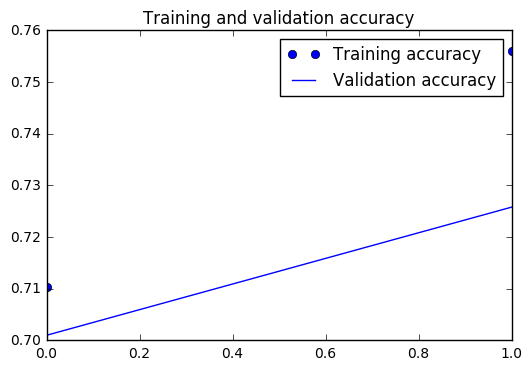

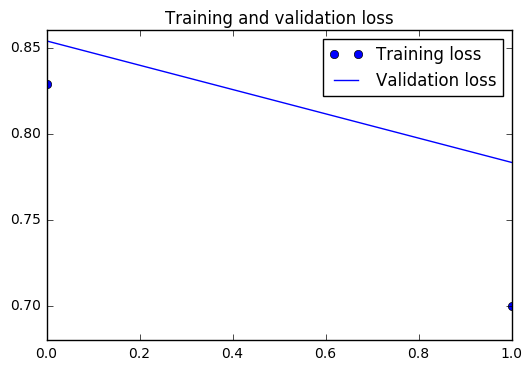

In [16]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Reading our own image and converting it into a numpy array based on RGB values in individual pixels

In [9]:
from PIL import Image
import numpy as np

img = Image.open("Image_1.png")
img.load()
data = np.asarray( img, dtype="int32" )


## Plotting the same to see if it matches the actual image

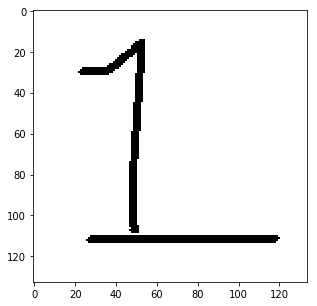

In [27]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.imshow(data[:,:,0], cmap='gray')
